In [983]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.io 
import librosa 
import librosa.display 
import wave
from glob import glob  #for reading files 
import glob 
import pickle as pk
import pickle
import csv 
import matplotlib.image as img
from skimage import io
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image #load images in python and convert it to RGB format

### Path to the Data and walk through the sessions of each bird

In [240]:
"""
- set the path for the wav files within session within bird_folder
- append .wav names in data["path_spec"], 
         birdname   in data["bird_name"],
         path_file  in data["file_path"]
- Files are sorted correctly, if not then SORT THEM 1-10"""

path_bird = "/home/ahmedabdalsattar/Desktop/CNN_data/"

data = {"labels":[], 
        "spec_name":[], 
        "time_length":[],
       "file_path":[],
       "spec_path":[]}
    
for i,(dirpath,dirnames,filenames) in enumerate(os.walk(path_bird)):
    
    if dirpath is not path_bird:     
        basename = os.path.basename(dirpath)
        if basename == '.ipynb_checkpoints':
            pass 
        else:
            dirpath_comp = dirpath.split("/")
            
            
        for f in filenames:
            file_path = os.path.join(dirpath,f)
            base = os.path.basename(file_path)
            if base.endswith('.wav'):
                
                data["spec_name"].append(base)
                data["file_path"].append(file_path)
            else:
                pass

In [ ]:
"""
- create a sampling frequency for each file
- find time length of each file and append it in data[time_length]
- create images.PNG and save them in spec_img folder"""

# notes 
"""1- Make Sure Data are not duplicated in the folder in case you run the code multiple times for the same dataset
   2- sample rate and how much time need to take from each file (one second or avg or more or less)depend on boutes"""


path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"

sampling_freq = 15000
n_fft = 2048
hop_length = 110


for g in range(len(data["spec_name"])):
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq)
    time_period = librosa.get_duration(signal,sr=sampling_freq)
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq,duration=1)

    plt.figure(figsize=(7,7))
    spec = librosa.feature.melspectrogram(signal,sr=sampling_freq,n_fft=n_fft,hop_length=hop_length)
    spec_db = librosa.power_to_db(spec,ref=np.max)
    librosa.display.specshow(spec_db,hop_length=hop_length)
    
    file_name = os.path.splitext(data["file_path"][g])
    file_name = file_name[-2]
    name_img = os.path.basename(file_name)
    plt.savefig(os.path.join(path_img , "{spe}".format(spe = name_img) + ".png"))
    data["spec_path"].append(name_img+".png")
    data["time_length"].append(time_period)
    

Text(0, 0.5, 'Frequency')

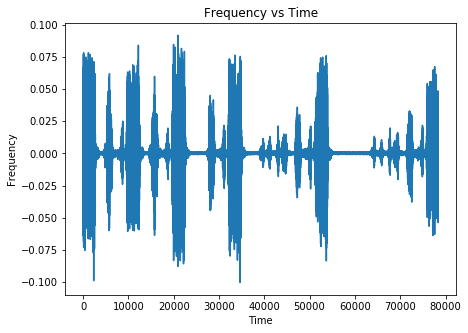

In [938]:
# Display example of audio as Frequency vs Time 


path_bird = "/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g8_20_test/2021-02-15/2021-02-15_POI0.wav"

signal,sr = librosa.load(path_bird,sr=sampling_freq)
plt.figure(figsize=(7,5))
plt.plot(signal)
plt.title("Frequency vs Time")
plt.xlabel("Time")
plt.ylabel("Frequency")

### Export Data into CSV file 

In [257]:

# path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/'

# bird_name = []
# # def data_csv_file(path_csv_file):

# with open(os.path.join(path_csv_file,'data_file.csv'),'w',newline='') as file:
#     fieldnames = ["spec_name","labels","wav_name","length_time","path_file"]
#     writer = csv.DictWriter(file,fieldnames=fieldnames)
#     writer.writeheader()
# with open(os.path.join(path_csv_file,'data_file.csv'),'a',newline='')as file:
#     writer = csv.writer(file)
#     for i in range(1,len(data["time_length"])):
#         writer = csv.DictWriter(file,fieldnames=fieldnames)
#         writer.writerow({'wav_name':data["spec_name"][i], 'spec_name':data["spec_path"][i],'path_file':data["file_path"][i],'length_time':data["time_length"][i]})



### Call .csv file (data) and turn to DataFrame 

In [602]:
path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file-1.csv'

dataframe = pd.read_csv(path_csv_file)

In [603]:
# print('Total size' , data.size)
# print('Shape of data' ,data.shape)
dataframe 

,spec_name,labels,wav_name,length_time,path_file
0,2021-02-15_POI1.png,1.0,2021-02-15_POI1.wav,2.997733,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
1,2021-02-15_POI2.png,1.0,2021-02-15_POI2.wav,2.477867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
2,2021-02-15_POI3.png,1.0,2021-02-15_POI3.wav,0.791467,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
3,2021-02-15_POI4.png,1.0,2021-02-15_POI4.wav,1.517867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
4,2021-02-15_POI5.png,1.0,2021-02-15_POI5.wav,2.230133,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
...,...,...,...,...,...
794,2020-10-12_POI95.png,2.0,2020-10-12_POI95.wav,1.279333,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
795,2020-10-12_POI96.png,1.0,2020-10-12_POI96.wav,1.126200,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
796,2020-10-12_POI97.png,1.0,2020-10-12_POI97.wav,1.210600,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
797,2020-10-12_POI98.png,1.0,2020-10-12_POI98.wav,1.817533,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...


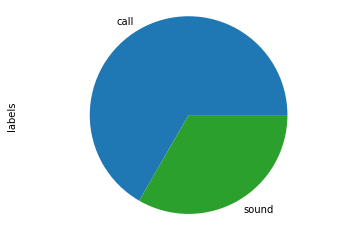

,spec_name,wav_name,length_time,path_file
labels,,,,
0.0,29,29,29,29
1.0,431,431,431,431
2.0,338,338,338,338


In [604]:
"""check out the data if its balanced to have equal number of classes (noise,sound,calls)"""

import pandas as pd
from matplotlib.pyplot import pie, axis, show
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'label': ['noise', 'sound', 'call'], 'labels': [0, 1, 2]})

df.labels.groupby(df.label).sum().plot(kind='pie')
plt.axis('equal')
plt.show()


count = dataframe.groupby(['labels']).count() 
count

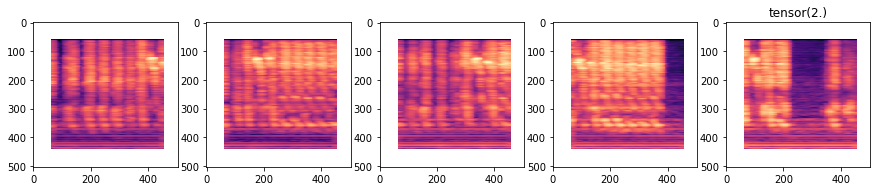

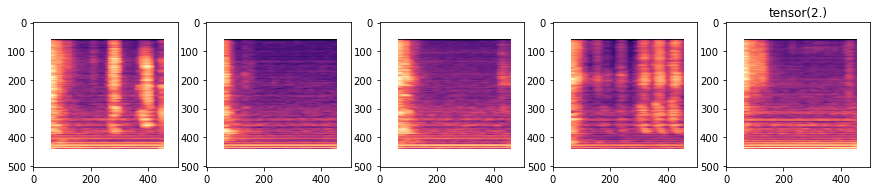

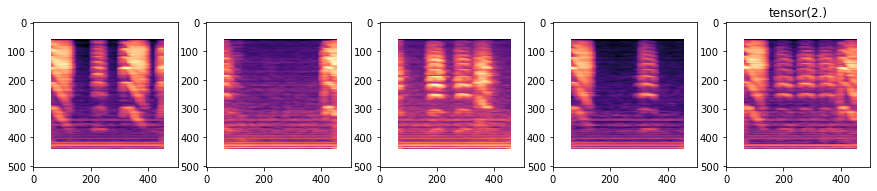

In [663]:
"""display example of images that shows Sound(row1),noise(row2),calls(row3)"""

import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(dataframe[dataframe['labels'] == 1]['spec_name'][-5:]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))

    
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 0]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))

    
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 2]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))


In [608]:
train, valid_data = train_test_split(dataframe, test_size=0.2)

In [609]:
# read data from .csv file 
path_csv = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file-1.csv'
data = pd.read_csv(path_csv)

# split the data into train and test sets to save each of them in a .csv file 
path_dir = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files"
def split_data(data,path_dir):
    train_data, test_data = train_test_split(data,test_size=0.2,random_state=1)
    if not os.path.exists(path_dir):
        os.makedirs(path_dir)
    return train_data,test_data



# train-set and test-set in a dataframe 
train_data = split_data(data,path_dir)[0]
test_data = split_data(data,path_dir)[1]



In [610]:
# save train and test set in a .csv_files (train_data.csv,test_data.csv)
train_x = train_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv',index=False)
test_x = test_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv',index=False)


In [611]:
#read data in .csv files 
path_train = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv'
path_test = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [612]:


# .pkl_files (train_set,test_set)
path_train_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_pickle.pkl"
path_test_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_pickle.pkl"

def save_pkl(path_pkl,data):
    with open (path_pkl,'wb') as file1:
        pickle.dump(data,file1)

        
save_pkl(path_train_pkl,train_data)
save_pkl(path_test_pkl,test_data)

#read .pkl files 
pickle_off = open(path_train_pkl,"rb")
read_pkl1 = pickle.load(pickle_off)

pickle_off = open(path_test_pkl,"rb")
read_pkl2 = pickle.load(pickle_off)



In [1033]:
# path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"
# train_path = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"

# # show spectrogrmas data from the last 10 in the datasets. 
# fig,ax = plt.subplots(1,10,figsize = (15,3))
# for i,idx in enumerate([df['labels'] == ]['path_spec'][-10:]):
#     path = os.path.join(train_path,idx)
#     ax[i].imshow(img.imread(path))
#     ax[i].set_title(df["labels"][i])
#     ax[i].set_xlabel("Time")
#     ax[i].set_ylabel("Frequency")
#     fig.suptitle("MFCC_spectrograms and its labels/from end of dataset")
  

 
# fig,ax = plt.subplots(1,10,figsize = (15,3))
# for i,idx in enumerate(df[df['labels']==0]['path_spec'][:10]):
#     path = os.path.join(train_path,idx)
#     a = ax[i].imshow(img.imread(path))
#     ax[i].set_title(df["labels"][i])
#     ax[i].set_xlabel("Time")
#     ax[i].set_ylabel("Frequency")
#     fig.suptitle("MFCC_spectrograms and its labels/from first of dataset")

# plt.show()

In [1116]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.7360, 0.1884, 0.3523],
        std=[0.3487, 0.7319, 0.5496],
    ),
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.7360, 0.1884, 0.3523],
        std=[0.3487, 0.7319, 0.5496],
    ),
])

### Dataset Class 

In [1117]:
class spec_song(Dataset):
    #init is initilizer 
    def __init__(self,root_dir, annotations,transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_pickle(annotations)
        self.transform = transform
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self,index):
        img_id = self.annotations.iloc[index,0]
        img = Image.open(os.path.join(self.root_dir,img_id)).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index,1]))
        if self.transform is not None:
            img = self.transform(img)
        return img,y_label #return image and label tuple 

path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"
path_test_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_pickle.pkl"

# display dataset of the test data 
a = spec_song(annotations=path_test_pkl,root_dir=path_img,transform=test_transform)
print(a.__getitem__(159))
print(a.__len__())


(tensor([[[0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571],
         [0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571],
         [0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571],
         ...,
         [0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571],
         [0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571],
         [0.7571, 0.7571, 0.7571,  ..., 0.7571, 0.7571, 0.7571]],

        [[1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089],
         [1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089],
         [1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089],
         ...,
         [1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089],
         [1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089],
         [1.1089, 1.1089, 1.1089,  ..., 1.1089, 1.1089, 1.1089]],

        [[1.1785, 1.1785, 1.1785,  ..., 1.1785, 1.1785, 1.1785],
         [1.1785, 1.1785, 1.1785,  ..., 1.1785, 1.1785, 1.1785],
         [1.1785, 1.1785, 1.1785,  ..., 1.1785, 1.1785, 1

### Dataset

In [1118]:
"""Dataset"""
train_data = spec_song(annotations=path_train_pkl,root_dir=path_img,transform=train_transform)
test_data = spec_song(annotations=path_test_pkl,root_dir=path_img,transform=test_transform)

### DataLoader

In [1126]:
"""DataLoader"""

input_size = 576 * 576 
num_epochs = 50
num_classes = 3
batch_size = 20
learning_rate = 0.001

train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(dataset = test_data,batch_size = batch_size, shuffle=False,num_workers=0)

### Find Mean and STD for all 3 channels of images 

In [1128]:
"""Two ways to find the mean and std for normalization using z-score 
1- easy way: load dataset using Pytorch DataLoader class and get a single 
batch tensor that include all train_data or test_data
(set the batch_size = len(train_data) train one time)
*** it may not work with large data"""


def norm_data(train_test_data):
    loader = DataLoader(train_data,batch_size=len(train_test_data),num_workers=1)
    data_l = next(iter(loader))
    # data_l[index= 0 is the data and index =1 is the labels][index= # channels(0,1,2)] ]
    channel1 = data_l[0][0][0].mean(),data_l[0][0][0].std()
    channel2 = data_l[0][1][1].mean(),data_l[0][1][1].std()
    channel3 = data_l[0][2][2].mean(),data_l[0][2][2].std()
    return channel1,channel2,channel3

norm_data(train_data)
# norm_data(test_data)

((tensor(0.3785), tensor(0.5000)),
 (tensor(0.5545), tensor(0.5000)),
 (tensor(0.5892), tensor(0.5000)))

### Plot distribution of pixels of image before normalizing 

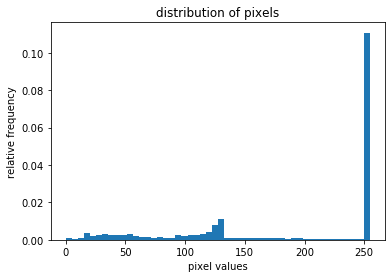

In [1129]:

from PIL import Image
image_path = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/2021-02-18_POI1.png"
image = Image.open(image_path)

plt.hist(np.array(image).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels");

### plot distribution of pixels of image after finding normilizing using z-score method and PyTorch 

size image [3, 504, 504]


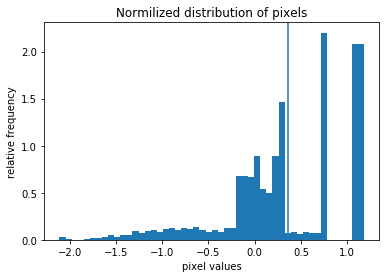

In [1130]:

image_path = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/2021-02-18_POI1.png"
image = Image.open(image_path).convert('RGB')

# mean and std is been calculated using PyTo
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.7360, 0.1884, 0.3523],
        std=[0.3487, 0.7319, 0.5496],
    ),
])


image_trans = transform(image)

plt.hist(np.array(image_trans).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("Normilized distribution of pixels")
#create a line that shows the mean in the histogram. 
plt.axvline(image_trans.mean())

print('size image',list(image_trans.size()))

### 2nd way of finding mean and std 

In [ ]:

"""
2- Hard_Way: manually implement mean and std and train over multiple batches 

this code below is for train_data and one channel only. since RGB we have to do it for 
three color channels. 
"""

loader  = DataLoader(train_data, batch_size=50,num_workers=1)
#calc n value (total number of pixels inside our dataset): len(data) * H_img * W_img
num_of_pixels = len(train_data) * 504 * 504 

#sum pixels by iterating over each batch and calc mean by dividing sum/total_num_pixels
total_sum = 0
for batch in loader:
    # below will give us total sum of all pixels inside dataset 
    total_sum += batch[0].sum()
    mean = total_sum/num_of_pixels 


# calc sum of squared errors by iterating thorough each batch 
# calc std by dividing sum of squared errors by the total num_pixls and square root the resule 

sum_of_squared_error = 0
for batch in loader: 
    sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error / num_of_pixels)
    
mean,std 

### 3d way of finding Mean and Std for three channels image 

In [1031]:
"""this is a function that rearange the array of [B,C,W,H] and find the meana and std"""

import torch
from torch.utils.data import TensorDataset, DataLoader


loader = DataLoader(train_data, batch_size=50)

nimages = 0
mean = 0.
std = 0.
for batch, _ in loader:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0) 
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print('   mean = ' , mean)
print('standatd_dev = ',std)

   mean =  tensor([0.6119, 0.1170, 0.3503])
standatd_dev =  tensor([0.4787, 0.7770, 0.5534])


In [ ]:
"""

WHY IM GETTING DIFFERENT MEAN AND STD FOR EACH METHOD I USED? 
    - is it because of the batches that changes everytime we iterate the function? 
    - something wrong with the code? 

"""

### Display Batch of DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_shape=  torch.Size([20, 3, 504, 504]) 
 labels_shape= torch.Size([20])


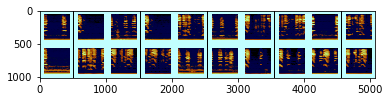

In [1131]:

def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()


"""both labels and images are tensors"""
print("image_shape= ", images.shape,'\n',"labels_shape=",labels.shape)

# show images
# 2 padding (default)
imshow(torchvision.utils.make_grid(images,10))




### Check GPU 

In [1132]:
# CPU or GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

### Display Images with its label of the Batch 

In [1135]:

"""trainimages, trainlabels are the images with its labels in a batch (50 image each batch)"""

trainimages, trainlabels = next(iter(train_loader))


print('vector shows: [#images_each batch, #channel,heigh_img,width_img] = ',trainimages.size())
def disp_img_batch(trainimages):
    for i in range(len(trainimages)):
        print('label = ', trainlabels[i])
        plt.imshow(trainimages[i][1],interpolation = 'nearest')
        plt.show()
    
# disp_img_batch(trainimages)



vector shows: [#images_each batch, #channel,heigh_img,width_img] =  torch.Size([20, 3, 504, 504])


### Apply CNN 

In [1136]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels = 3, out_channels =3, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features = 3 * 504 * 504, out_features = 1024)
        self.fc2 = nn.Linear(in_features =1024, out_features = 3)
        
#         self.out = nn.Linear(in_features =,out_features = )
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [1137]:
"""display CNN class for the Network"""
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=762048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=3, bias=True)
)


In [1138]:

"""
- class weight inside function conv1 which inside class model = CNN()
- 

below are the weights inside the conv1 layer
- notice 'Parameter Containing': it is special tensor because its values 
are learnable parameters for network, meaning the below values are learned 
as the Network is trained
- as we train, these weight values are updated in such a way that the loss 
function is minimized 
- """
model.conv1.weight

Parameter containing:
tensor([[[[-0.1658,  0.0756,  0.0912],
          [-0.0733, -0.0699, -0.1651],
          [ 0.1132,  0.1389,  0.0591]],

         [[ 0.0475, -0.0899, -0.1675],
          [-0.0980, -0.0317, -0.1404],
          [ 0.0157,  0.0841, -0.1349]],

         [[ 0.0490,  0.0104, -0.1214],
          [-0.0708,  0.0143, -0.0745],
          [ 0.0061,  0.0951, -0.0499]]],


        [[[-0.1188, -0.1016, -0.0290],
          [-0.1537, -0.0026,  0.1387],
          [-0.0020, -0.0672,  0.0360]],

         [[-0.1205,  0.0835, -0.0273],
          [ 0.0323, -0.1154,  0.1896],
          [ 0.0744, -0.1065, -0.0464]],

         [[ 0.1881, -0.1460, -0.0340],
          [-0.1718, -0.1788, -0.1190],
          [-0.1275,  0.0613, -0.0121]]],


        [[[-0.0976, -0.1364,  0.0680],
          [-0.1436, -0.1874, -0.1836],
          [ 0.1328,  0.1345, -0.1161]],

         [[ 0.0662, -0.0451, -0.0445],
          [ 0.0976,  0.1160, -0.1014],
          [-0.0838,  0.0816,  0.0814]],

         [[ 0.1536, -0

In [897]:
"""to keep track of all weight tensors inside the netowrk,Pytorch class called 
Parameter """

'to keep track of all weight tensors inside the netowrk,Pytorch class called \nParameter '

In [1139]:
"""
[#num_filter, depth_of_each_filter(inputchannels),H_filter,W_filter]"""
model.conv1.weight.shape
# [#num_filter, depth_of_each_filter(inputchannels),H_filter,W_filter]
# rank4 tensor 
model.conv2.weight.shape 
model.fc1.weight.shape
model.fc2.weight.shape
# we can pull any single filter out by indexing into weight tensor first axis 
model.conv1.weight[0].shape

# torch.size([input_height,output_width]) rank2 tensor 
# heights = out_features and width = in_features
model.fc1.weight.shape
model.fc2.weight.shape

torch.Size([3, 1024])

In [1140]:
"""
getting all the learnable parameters of our weights 
including the bias as a learnable parameter for each layer 
- each layer has a weight tensor and a bias tensor 
"""

for name, param in model.named_parameters():
    print(name,'t\t',param.shape)

conv1.weight t	 torch.Size([3, 3, 3, 3])
conv1.bias t	 torch.Size([3])
conv2.weight t	 torch.Size([3, 3, 3, 3])
conv2.bias t	 torch.Size([3])
fc1.weight t	 torch.Size([1024, 762048])
fc1.bias t	 torch.Size([1024])
fc2.weight t	 torch.Size([3, 1024])
fc2.bias t	 torch.Size([3])


In [1141]:
model = CNN()
print(model)
device = ("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

CNN(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=762048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=3, bias=True)
)


In [1142]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [1151]:

# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        #clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        #forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        #calculate-the-batch-loss
        loss = criterion(output, target)
        #backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        #perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        #update-training-loss
        train_loss += loss.item() * data.size()
        
    # validate-the-model
#     model.eval()
#     for data, target in test_loader:
        
#         data = data.to(device)
#         target = target.to(device)
        
#         output = model(data)
        
#         loss = criterion(output, target)
        
#         # update-average-validation-loss 
        valid_loss += loss.item() * data.size()
    
#     # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
#     valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
#     valid_losses.append(valid_loss)
        
#     print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # labels CrossEntropyLoss expects targets to be class indices,
        #and hence Long Tensors, but you gave it a Float Tensor.
        labels = labels.to(device=device, dtype=torch.int64)
        # squeeze the dimensions to labels.squeez(1)
#         labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
# PATH = ''
# torch.save(model.state_dict(), PATH)

# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0
#     n_class_correct = [0 for i in range(10)]
#     n_class_samples = [0 for i in range(10)]
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         # max returns (value ,index)
#         _, predicted = torch.max(outputs, 1)
#         n_samples += labels.size(0)
#         n_correct += (predicted == labels).sum().item()
        
#         for i in range(batch_size):
#             label = labels[i]
#             pred = predicted[i]
#             if (label == pred):
#                 n_class_correct[label] += 1
#             n_class_samples[label] += 1

#     acc = 100.0 * n_correct / n_samples
#     print(f'Accuracy of the network: {acc} %')

#     for i in range(10):
#         acc = 100.0 * n_class_correct[i] / n_class_samples[i]
#         print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
# # keeping-track-of-losses 
# train_losses = []
# valid_losses = []

# for epoch in range(1, num_epochs + 1):
#     # keep-track-of-training-and-validation-loss
#     train_loss = 0.0
#     valid_loss = 0.0
    
#     # training-the-model
#     model.train()
#     for data, target in train_loader:
#         # move-tensors-to-GPU 
#         data = data.to(device)
#         target = target.to(device)
#         # clear-the-gradients-of-all-optimized-variables
#         optimizer.zero_grad()
#         # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
#         output = model(data)
#         # calculate-the-batch-loss
#         loss = criterion(output, target)
# # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
#         loss.backward()
#         # perform-a-ingle-optimization-step (parameter-update)
#         optimizer.step()
#         # update-training-loss
#         train_loss += loss.item() * data.size(0)
        
#     # validate-the-model
#     model.eval()
#     for data, target in test_loader:
        
#         data = data.to(device)
#         target = target.to(device)
        
#         output = model(data)
        
#         loss = criterion(output, target)
        
#         # update-average-validation-loss 
#         valid_loss += loss.item() * data.size(0)
    
#     calculate-average-losses
#     train_loss = train_loss/len(train_loader.sampler)
#     valid_loss = valid_loss/len(test_loader.sampler)
#     train_losses.append(train_loss)
#     valid_losses.append(valid_loss)
# # print-training/validation-statistics 
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss))